<a href="https://colab.research.google.com/github/Arshad8979/ArshadBhai/blob/main/HeartAttack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting Heart Disease

The World Health Organization (WHO) estimates that 17.9 million people die every year because of cardiovascular diseases (CVDs).

There are multiple risk factors that could contribute to CVD in an individual such as unhealthy diet, lack of physical activity or mental illnesses. Being able to identify these risk factors in individuals early on could help prevent a lot of premature deaths.

In this project, we will use the [Kaggle dataset](https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction) and build a K-Nearest Neighbors classifier to accurately predict the likelihood of a patient having a heart disease in the future.

In [3]:
# import libraries
import pandas as pd

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [15]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/datasets/heart-disease-dataset.csv')


## EDA: Descriptive Statistics

We will start with exploring our dataset. As per the source, each patient has the following information collected about them:


1. `Age`: age of the patient [years]
2. `Sex`: sex of the patient [M: Male, F: Female]
3. `ChestPainType`: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
4. `RestingBP`: resting blood pressure [mm Hg]
5. `Cholesterol`: serum cholesterol [mm/dl]
6. `FastingBS`: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
7. `RestingECG`: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
8. `MaxHR`: maximum heart rate achieved [Numeric value between 60 and 202]
9. `ExerciseAngina`: exercise-induced angina [Y: Yes, N: No]
10. `Oldpeak`: oldpeak = ST [Numeric value measured in depression]
11. `ST_Slope`: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
12. `HeartDisease`: output class [1: heart disease, 0: Normal]

In [17]:
#load dataset
df = pd.read_csv("/content/drive/MyDrive/datasets/heart-disease-dataset.csv")

In [18]:
df.head()

,age,sex,chest_pain_type,resting_bp_s,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_angina,oldpeak,st_slope,target
0,40.0,1.0,2.0,140.0,289.0,0.0,0.0,172.0,0.0,0.0,1.0,0.0
1,49.0,0.0,3.0,160.0,180.0,0.0,0.0,156.0,0.0,1.0,2.0,1.0
2,37.0,1.0,2.0,130.0,283.0,0.0,1.0,98.0,0.0,0.0,1.0,0.0
3,48.0,0.0,4.0,138.0,214.0,0.0,0.0,108.0,1.0,1.5,2.0,1.0
4,54.0,1.0,3.0,150.0,195.0,0.0,0.0,122.0,0.0,0.0,1.0,0.0


The dataset seems to contain both numerical and categorical features. Let's look at the datatype for each column.

In [19]:
print(df.dtypes)
df.dtypes.value_counts()

age                    float64
sex                    float64
chest_pain_type        float64
resting_bp_s           float64
cholesterol            float64
fasting_blood_sugar    float64
resting_ecg            float64
max_heart_rate         float64
exercise_angina        float64
oldpeak                float64
st_slope               float64
target                 float64
dtype: object


,count
float64,12


In [20]:
df.describe()

,age,sex,chest_pain_type,resting_bp_s,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_angina,oldpeak,st_slope,target
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,0.763866,3.232773,132.153782,210.363866,0.213445,0.698319,139.732773,0.387395,0.922773,1.624370,0.528571
std,9.358203,0.424884,0.935480,18.368823,101.420489,0.409912,0.870359,25.517636,0.487360,1.086337,0.610459,0.499393
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,188.000000,0.000000,0.000000,121.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,229.000000,0.000000,0.000000,140.500000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,269.750000,0.000000,2.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


From the table above, we can observe that:

- The average age of patients is ~`53` years.
- The median for `Cholesterol` is higher than its mean by roughly `25` mm/dl, indicating that it could be a left-skewed distribution with a possibility of outliers skewing the distribution.
- `RestingBP` and `Cholesterol` have a minimum value of zero.
- There don't seem to be any missing values in these columns. But we will have to confirm it across the entire dataset as well.

`RestingBP` can't be `0`. And, as per the [American Heart Association](https://www.heart.org/en/health-topics/cholesterol/about-cholesterol/what-your-cholesterol-levels-mean), serum cholesterol is a composite of different measurements. So, it is unlikely that `Cholesterol` would be `0` as well. We will have to clean both of these up later.

Next, we will look at the categorical variables. It would also be beneficial to look at how the target feature, `HeartDisease`, is related to those categories. Before that, let's quickly check if there are any missing values in the dataset or not.

In [21]:
df.isna().sum()

,0
age,0
sex,0
chest_pain_type,0
resting_bp_s,0
cholesterol,0
fasting_blood_sugar,0
resting_ecg,0
max_heart_rate,0
exercise_angina,0
oldpeak,0


There are no missing values in this dataset!

## EDA:


In [23]:
# Categorical columns = those with <= 10 unique values
cat_cols = [col for col in df.columns if df[col].nunique() <= 10]

# Numeric columns
num_cols = [col for col in df.columns if df[col].nunique() > 10]

print("Categorical Columns:", cat_cols)
print("Numeric Columns:", num_cols)


Categorical Columns: ['sex', 'chest_pain_type', 'fasting_blood_sugar', 'resting_ecg', 'exercise_angina', 'st_slope', 'target']
Numeric Columns: ['age', 'resting_bp_s', 'cholesterol', 'max_heart_rate', 'oldpeak']


We can confirm that those columns are indeed categorical given the number of unique values in each of them. But, we can't gather much else. Also, `sasting_blood_sugar` and `HeartDisease` are categorical as well since they only contain binary values. We can confirm that quickly as well.


## Categorical Cloumns


===== sex =====
sex
1.0    909
0.0    281
Name: count, dtype: int64


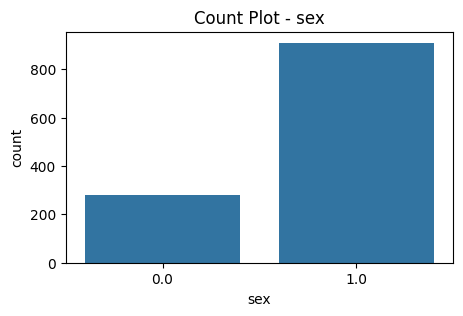


===== chest_pain_type =====
chest_pain_type
4.0    625
3.0    283
2.0    216
1.0     66
Name: count, dtype: int64


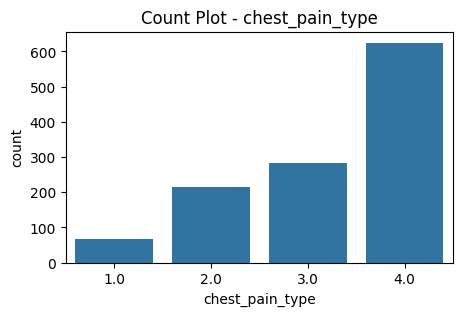


===== fasting_blood_sugar =====
fasting_blood_sugar
0.0    936
1.0    254
Name: count, dtype: int64


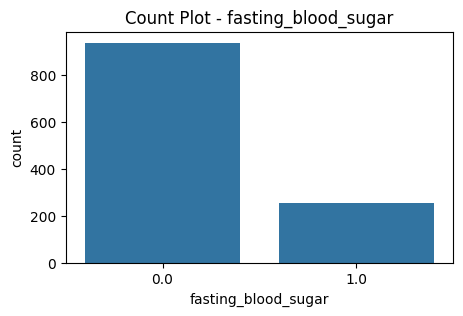


===== resting_ecg =====
resting_ecg
0.0    684
2.0    325
1.0    181
Name: count, dtype: int64


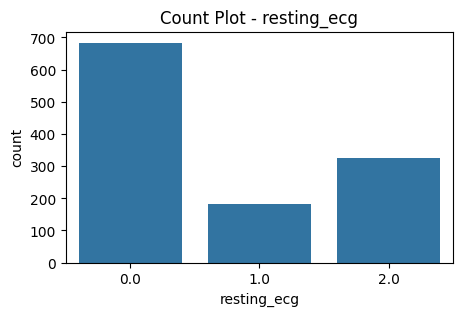


===== exercise_angina =====
exercise_angina
0.0    729
1.0    461
Name: count, dtype: int64


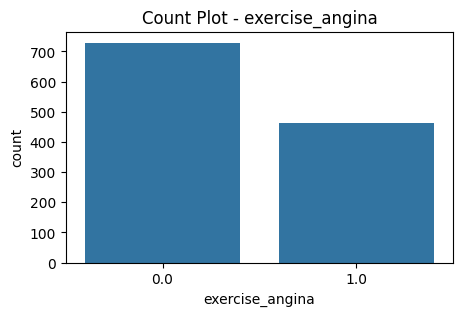


===== st_slope =====
st_slope
2.0    582
1.0    526
3.0     81
0.0      1
Name: count, dtype: int64


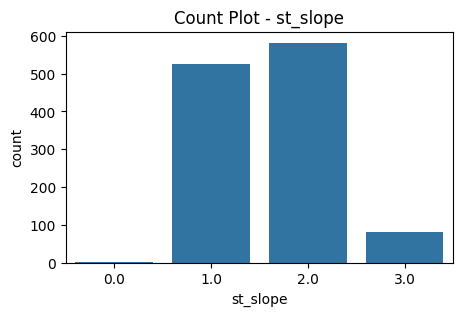


===== target =====
target
1.0    629
0.0    561
Name: count, dtype: int64


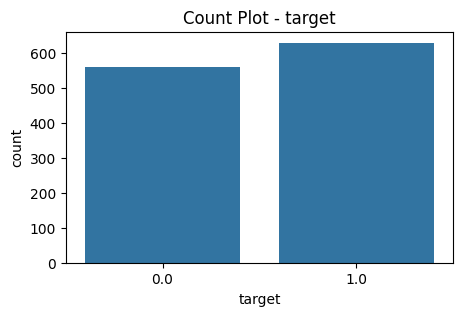

In [24]:
for col in cat_cols:
    print(f"\n===== {col} =====")
    print(df[col].value_counts())

    plt.figure(figsize=(5,3))
    sns.countplot(data=df, x=col)
    plt.title(f"Count Plot - {col}")
    plt.show()


##Numeric Columns

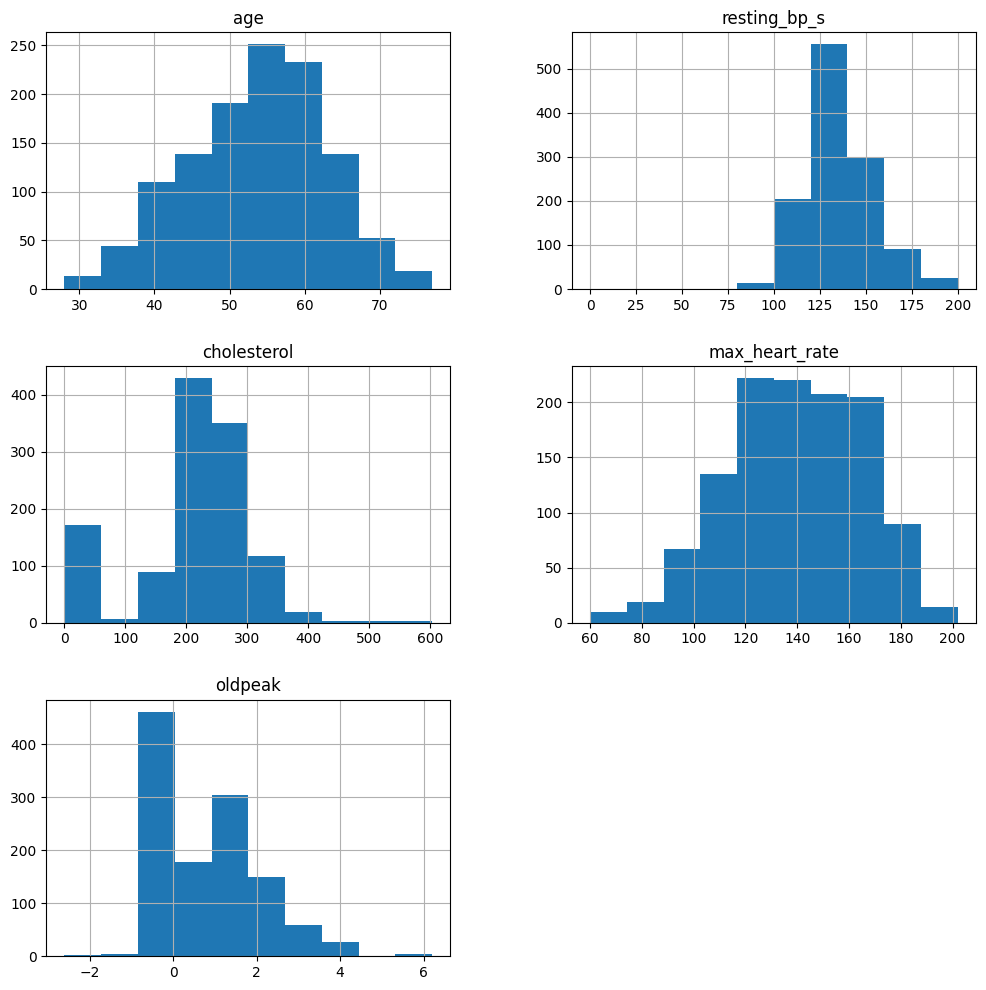

In [25]:
df[num_cols].hist(figsize=(12, 12))
plt.show()


##Box Plot

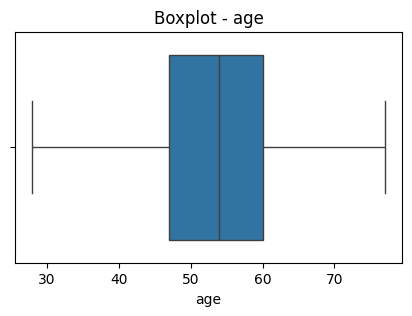

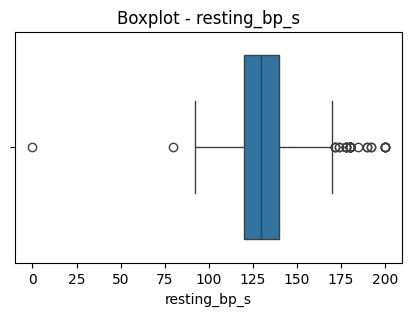

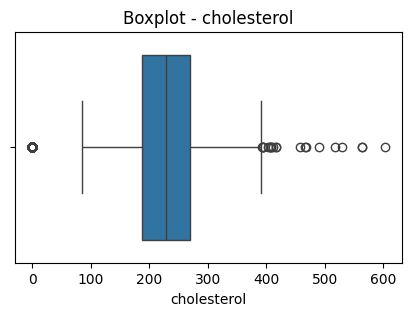

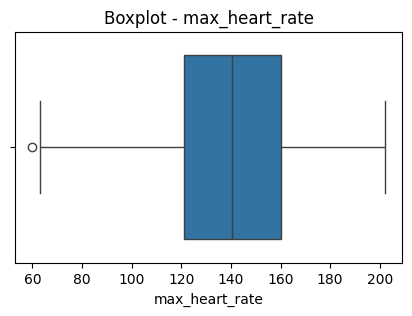

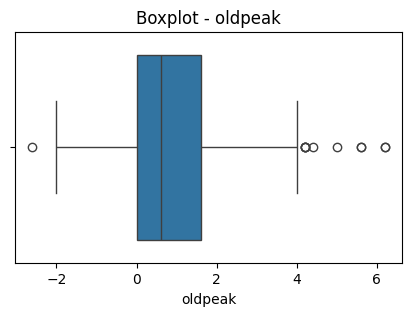

In [26]:
for col in num_cols:
    plt.figure(figsize=(5,3))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot - {col}")
    plt.show()


##Coorelation Matrix

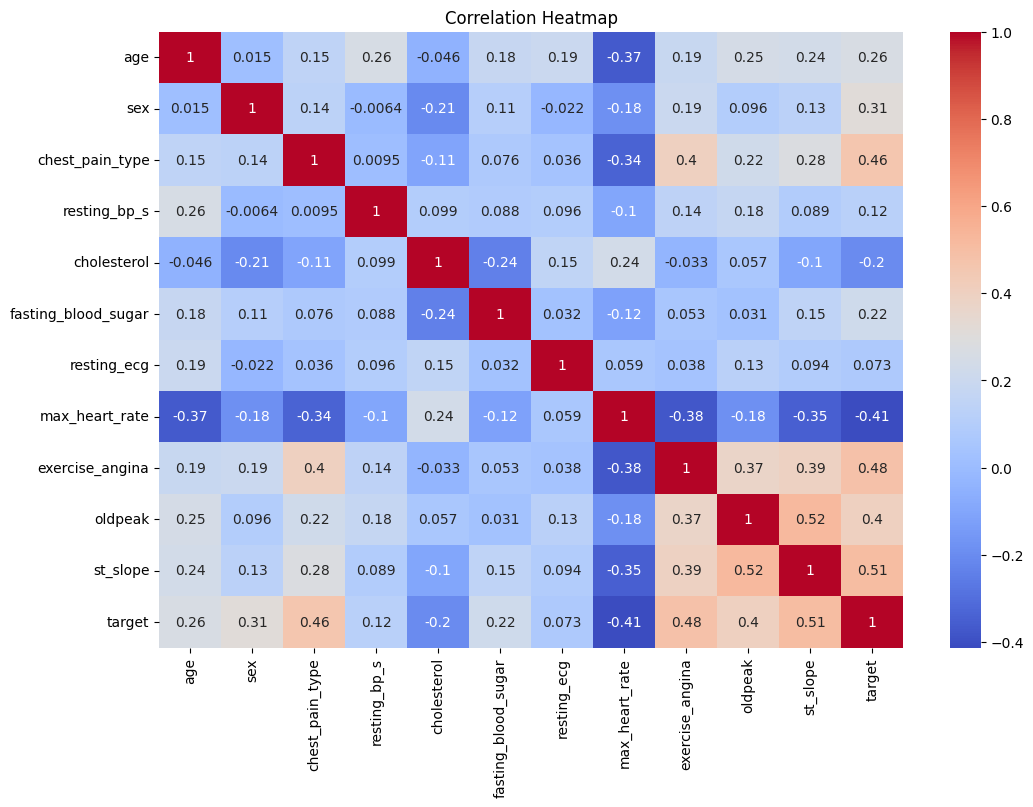

In [27]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


#Coorelation Between Features

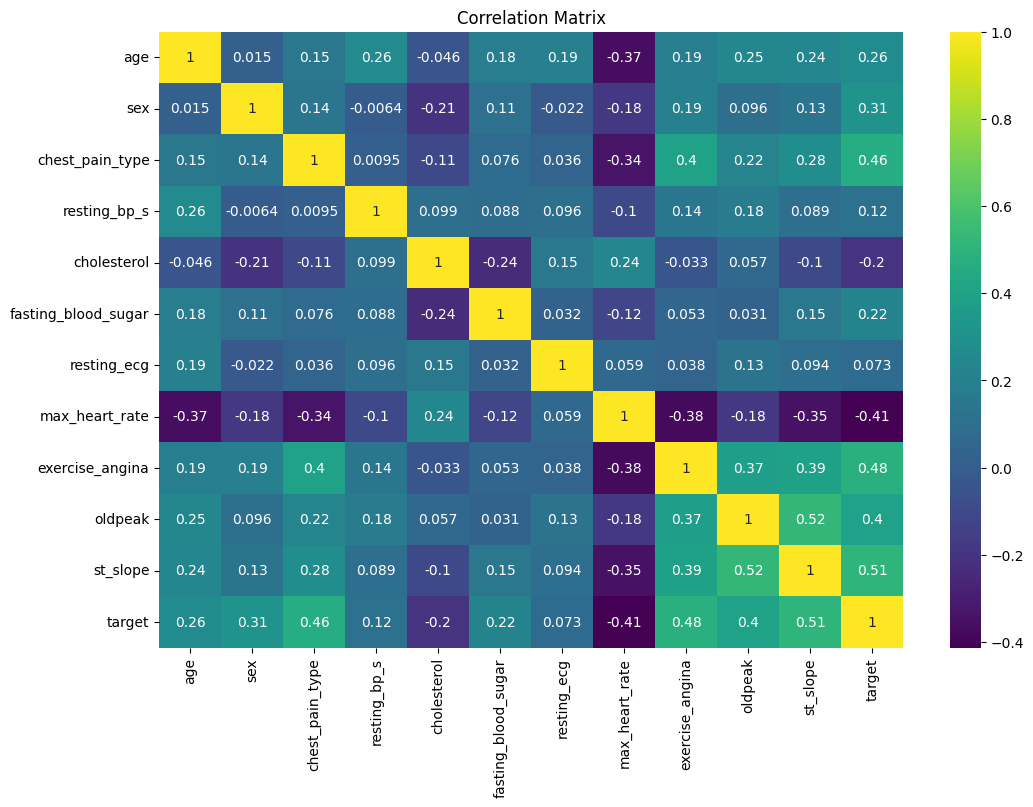

In [28]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap="viridis")
plt.title("Correlation Matrix")
plt.show()


#Coorelation with Target

In [29]:
target_corr = df.corr()['target'].sort_values(ascending=False)
print(target_corr)


target                 1.000000
st_slope               0.505608
exercise_angina        0.481467
chest_pain_type        0.460127
oldpeak                0.398385
sex                    0.311267
age                    0.262029
fasting_blood_sugar    0.216695
resting_bp_s           0.121415
resting_ecg            0.073059
cholesterol           -0.198366
max_heart_rate        -0.413278
Name: target, dtype: float64


#Multicollinearity Check using VIF (Variance Inflation Factor)

In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X_vif = add_constant(df.drop('target', axis=1))

vif_data = pd.DataFrame()
vif_data["Feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i)
                   for i in range(X_vif.shape[1])]

vif_data


,Feature,VIF
0,const,201.101286
1,age,1.343905
2,sex,1.103252
3,chest_pain_type,1.281478
4,resting_bp_s,1.119745
5,cholesterol,1.208280
6,fasting_blood_sugar,1.118493
7,resting_ecg,1.097179
8,max_heart_rate,1.524154
9,exercise_angina,1.485969


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['VIF'].plot(kind='hist', bins=20, title='VIF')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='index', y='VIF', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['VIF']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('VIF')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_5['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_6['VIF'].plot(kind='line', figsize=(8, 4), title='VIF')
plt.gca().spines[['top', 'right']].set_visible(False)

##Feature Selection

From our correlation heatmap, we can identify the following features to be positively correlated (correlation coefficient greater than 0.3) to `HeartDisease`:

- `Oldpeak`
- `MaxHR`
- `ChestPainType_ATA`
- `ExerciseAngina_Y`
- `ST_Slope_Flat`
- `ST_Slope_Up`

The correlation coefficient threshold was chosen arbitrarily. Surprisingly, `Cholesterol` is not strongly correlated to `HeartDisease`. We can consider ignoring the feature for now.

Given everything we have attempted so far, we can narrow down our features to the following:

- `Oldpeak`
- `Sex_M`
    - It has a relatively low value for the coefficient, but given what we observed in our EDA, let's also take it into account.
- `ExerciseAngina_Y`
- `ST_Slope_Flat`
- `ST_Slope_Up`

Time to create our model using these features!

In [33]:
from sklearn.feature_selection import mutual_info_classif

X = df.drop('target', axis=1)
y = df['target']

mi = mutual_info_classif(X, y)
mi_series = pd.Series(mi, index=X.columns).sort_values(ascending=False)

print("\n\nMutual Information Scores:\n")
mi_series




Mutual Information Scores:



,0
st_slope,0.157029
chest_pain_type,0.141283
exercise_angina,0.128179
cholesterol,0.117554
oldpeak,0.117015
max_heart_rate,0.110749
age,0.041374
sex,0.033705
resting_bp_s,0.029907
fasting_blood_sugar,0.027660


##Feature Importance – Random Forest (TREE-BASED)

In [38]:
from sklearn.ensemble import RandomForestClassifier

X = df.drop('target', axis=1)
y = df['target']

model = RandomForestClassifier(random_state=42)
model.fit(X, y)

importances = model.feature_importances_

tree_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': importances
}).sort_values(by='importance', ascending=False)

tree_importance


,feature,importance
10,st_slope,0.191213
2,chest_pain_type,0.135547
7,max_heart_rate,0.117334
9,oldpeak,0.111069
4,cholesterol,0.107771
0,age,0.086331
8,exercise_angina,0.082646
3,resting_bp_s,0.082216
1,sex,0.040066
6,resting_ecg,0.026394


##Plot Feature Importances

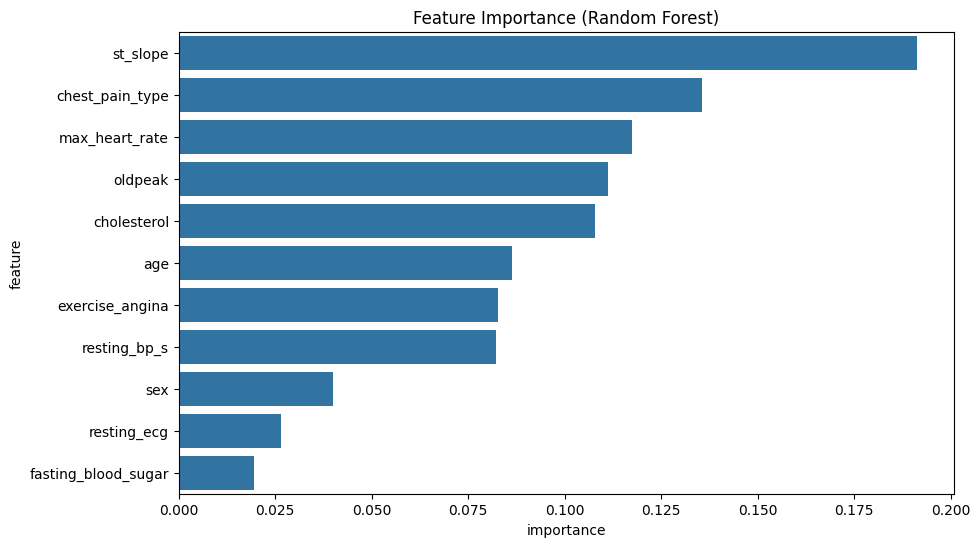

In [39]:
plt.figure(figsize=(10,6))
sns.barplot(data=tree_importance, x='importance', y='feature')
plt.title("Feature Importance (Random Forest)")
plt.show()


##Select Top Features

In [40]:
top_features = tree_importance.head(10)['feature'].tolist()
top_features


['st_slope',
 'chest_pain_type',
 'max_heart_rate',
 'oldpeak',
 'cholesterol',
 'age',
 'exercise_angina',
 'resting_bp_s',
 'sex',
 'resting_ecg']

##Train/Test Split + Model

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(
    df[top_features], y, test_size=0.2, random_state=42
)

clf = LogisticRegression(max_iter=500)
clf.fit(X_train, y_train)

preds = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, preds))


Accuracy: 0.8403361344537815


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


##Precision, Recall, F1 — Actual Performance

In [42]:
from sklearn.metrics import classification_report

print(classification_report(y_test, preds))


              precision    recall  f1-score   support

         0.0       0.85      0.79      0.82       107
         1.0       0.83      0.89      0.86       131

    accuracy                           0.84       238
   macro avg       0.84      0.84      0.84       238
weighted avg       0.84      0.84      0.84       238



##ROC Curve + AUC Score

AUC Score: 0.9039024042234429


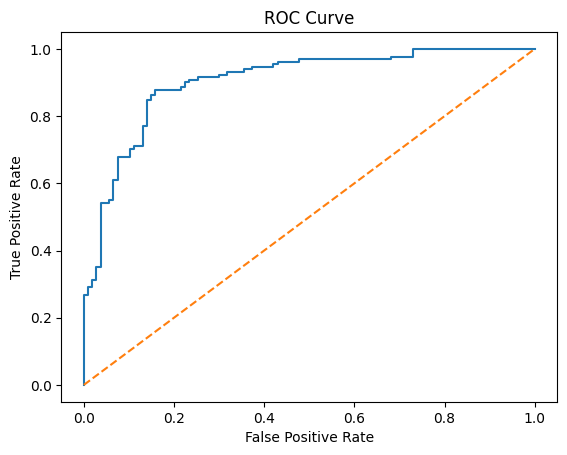

In [43]:
from sklearn.metrics import roc_auc_score, roc_curve

y_prob = clf.predict_proba(X_test)[:, 1]

auc = roc_auc_score(y_test, y_prob)
print("AUC Score:", auc)

fpr, tpr, _ = roc_curve(y_test, y_prob)

plt.plot(fpr, tpr)
plt.plot([0,1],[0,1], '--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()


##Cross-Validation

In [44]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(clf, X, y, cv=5)
print("Cross-validation scores:", scores)
print("Mean accuracy:", scores.mean())


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Cross-validation scores: [0.8487395  0.82352941 0.8487395  0.76890756 0.79411765]
Mean accuracy: 0.8168067226890756


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


##Hyperparameter Tuning (GridSearch / RandomSearch)

In [46]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10]
}

grid = GridSearchCV(RandomForestClassifier(), params, cv=5)
grid.fit(X_train, y_train)

print("Best Params:", grid.best_params_)


Best Params: {'max_depth': 10, 'n_estimators': 100}


##Model Comparison

In [47]:
from sklearn.svm import SVC

clf2 = SVC(probability=True)
clf2.fit(X_train, y_train)
preds2 = clf2.predict(X_test)

print("SVM Accuracy:", accuracy_score(y_test, preds2))


SVM Accuracy: 0.7310924369747899


In [48]:
import joblib
joblib.dump(clf, "model.pkl")


['model.pkl']

In [52]:
print(list(X.columns))


['age', 'sex', 'chest_pain_type', 'resting_bp_s', 'cholesterol', 'fasting_blood_sugar', 'resting_ecg', 'max_heart_rate', 'exercise_angina', 'oldpeak', 'st_slope']


In [53]:
import pandas as pd

cols = list(X.columns)   # exact columns from training
values = []

print("Enter values in this exact order:\n")
print(cols)

for col in cols:
    val = float(input(f"{col}: "))
    values.append(val)

input_df = pd.DataFrame([values], columns=cols)

pred = clf.predict(input_df)

if pred[0] == 1:
    print("\nHeart Disease: YES")
else:
    print("\nHeart Disease: NO")


Enter values in this exact order:

['age', 'sex', 'chest_pain_type', 'resting_bp_s', 'cholesterol', 'fasting_blood_sugar', 'resting_ecg', 'max_heart_rate', 'exercise_angina', 'oldpeak', 'st_slope']
age: 25
sex: 1
chest_pain_type: 1
resting_bp_s: 120
cholesterol: 140
fasting_blood_sugar: 0
resting_ecg: 1
max_heart_rate: 80
exercise_angina: 0
oldpeak: 1.5
st_slope: 0


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- fasting_blood_sugar
